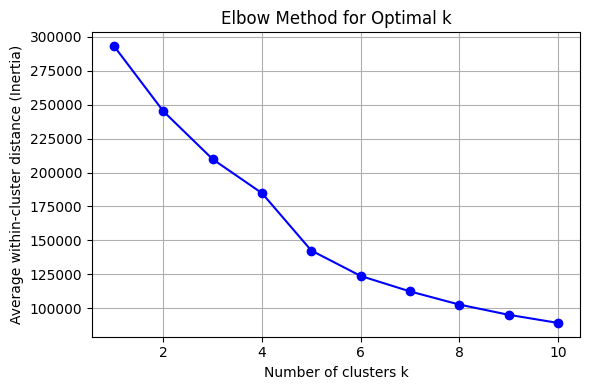

K-means model accuracy with k=2: 0.9542


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load data
# -----------------------------
df = pd.read_csv("AdultUCI.csv")

# Assume the income/target column is named 'income' (e.g. '>50K' or '<=50K')
target_col = 'income'  # change if your column name differs

# Separate target for accuracy check
y_true = df[target_col]

# -----------------------------
# 2. Remove categorical features, keep target
# -----------------------------
numeric_df = df.select_dtypes(include=[np.number])  # only numeric features

# Normalize numeric variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# -----------------------------
# 3. K-means clustering & Elbow plot
# -----------------------------
inertias = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)  # average within-cluster sum of squares

# Plot elbow curve
plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, 'o-', color='blue')
plt.xlabel('Number of clusters k')
plt.ylabel('Average within-cluster distance (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------
# 4. k-means with k=2 and accuracy
# -----------------------------
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Convert target to binary 0/1 for comparison
# Adjust mapping if your income column differs
y_binary = y_true.apply(lambda x: 1 if '>50K' in str(x) else 0)

# Because cluster labels are arbitrary, check both label assignments
acc1 = accuracy_score(y_binary, clusters)
acc2 = accuracy_score(y_binary, 1 - clusters)
accuracy = max(acc1, acc2)

print(f"K-means model accuracy with k=2: {accuracy:.4f}")
